In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib

df = pd.read_csv('cleaned_datasets/2_liga/2016/cleaned_dataset_2_liga_2016.csv')
df = df.rename({"Unnamed: 0": "Match_Number"}, axis= 'columns') #rename index column to Match_Number and apply to DataFrames

In [2]:
df.describe() #generate descriptive statistics

,Match_Number,Round,Home_Goals,Away_Goals,Home_Match_Outcome,Home_Points,Away_Match_Outcome,Away_Points,Total_Home_Goals_So_Far,Total_Away_Goals_So_Far,Cumulative_Home_Goals,Cumulative_Away_Goals,Total_Home_Points_So_Far,Total_Away_Points_So_Far,Cumulative_Home_Points,Cumulative_Away_Points
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,152.500000,17.500000,1.395425,1.245098,0.866013,1.526144,0.977124,1.192810,11.980392,11.176471,204.460784,191.228758,13.143791,11.101307,223.718954,190.189542
std,88.478811,9.826778,1.240245,1.160296,0.824833,1.301060,0.765742,1.264424,8.712133,6.971716,120.713073,108.510542,8.720745,7.401785,133.350516,106.194116
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000
25%,76.250000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,5.000000,101.500000,100.000000,6.250000,5.000000,106.750000,100.000000
50%,152.500000,17.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,11.000000,206.000000,188.000000,12.000000,11.000000,224.500000,187.000000
75%,228.750000,26.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,16.000000,16.750000,307.500000,282.750000,19.000000,16.000000,338.250000,282.000000
max,305.000000,34.000000,6.000000,6.000000,2.000000,3.000000,2.000000,3.000000,47.000000,37.000000,427.000000,381.000000,41.000000,31.000000,467.000000,365.000000


In [3]:
df.info() #return columns and value data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Match_Number              306 non-null    int64
 1   Round                     306 non-null    int64
 2   Home_Goals                306 non-null    int64
 3   Away_Goals                306 non-null    int64
 4   Home_Match_Outcome        306 non-null    int64
 5   Home_Points               306 non-null    int64
 6   Away_Match_Outcome        306 non-null    int64
 7   Away_Points               306 non-null    int64
 8   Total_Home_Goals_So_Far   306 non-null    int64
 9   Total_Away_Goals_So_Far   306 non-null    int64
 10  Cumulative_Home_Goals     306 non-null    int64
 11  Cumulative_Away_Goals     306 non-null    int64
 12  Total_Home_Points_So_Far  306 non-null    int64
 13  Total_Away_Points_So_Far  306 non-null    int64
 14  Cumulative_Home_Points    306 non-null    

In [4]:
df.value_counts() #return a Series containing counts of unique rows in Dataframe

Match_Number  Round  Home_Goals  Away_Goals  Home_Match_Outcome  Home_Points  Away_Match_Outcome  Away_Points  Total_Home_Goals_So_Far  Total_Away_Goals_So_Far  Cumulative_Home_Goals  Cumulative_Away_Goals  Total_Home_Points_So_Far  Total_Away_Points_So_Far  Cumulative_Home_Points  Cumulative_Away_Points
0             1      1           3           1                   0            0                   3            1                        3                        1                      3                      0                         3                         0                       3                         1
201           23     2           0           0                   3            1                   0            35                       16                       262                    243                    26                        18                        291                     252                       1
208           24     0           2           1                   0      

In [5]:
df.isnull().sum() #check for null values in each column

Match_Number                0
Round                       0
Home_Goals                  0
Away_Goals                  0
Home_Match_Outcome          0
Home_Points                 0
Away_Match_Outcome          0
Away_Points                 0
Total_Home_Goals_So_Far     0
Total_Away_Goals_So_Far     0
Cumulative_Home_Goals       0
Cumulative_Away_Goals       0
Total_Home_Points_So_Far    0
Total_Away_Points_So_Far    0
Cumulative_Home_Points      0
Cumulative_Away_Points      0
dtype: int64

In [6]:
df.sum() #calculate sum of values in each column

Match_Number                46665
Round                        5355
Home_Goals                    427
Away_Goals                    381
Home_Match_Outcome            265
Home_Points                   467
Away_Match_Outcome            299
Away_Points                   365
Total_Home_Goals_So_Far      3666
Total_Away_Goals_So_Far      3420
Cumulative_Home_Goals       62565
Cumulative_Away_Goals       58516
Total_Home_Points_So_Far     4022
Total_Away_Points_So_Far     3397
Cumulative_Home_Points      68458
Cumulative_Away_Points      58198
dtype: int64

In [7]:
df.shape

(306, 16)

(array([ 93.,   0.,   0.,  86.,   0.,   0.,   0.,   0.,   0., 127.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

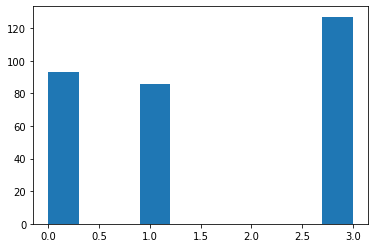

In [8]:
import matplotlib.pylab as plt
plt.rcParams['figure.facecolor'] = 'white'
plt.hist(df["Home_Points"])

<AxesSubplot:>

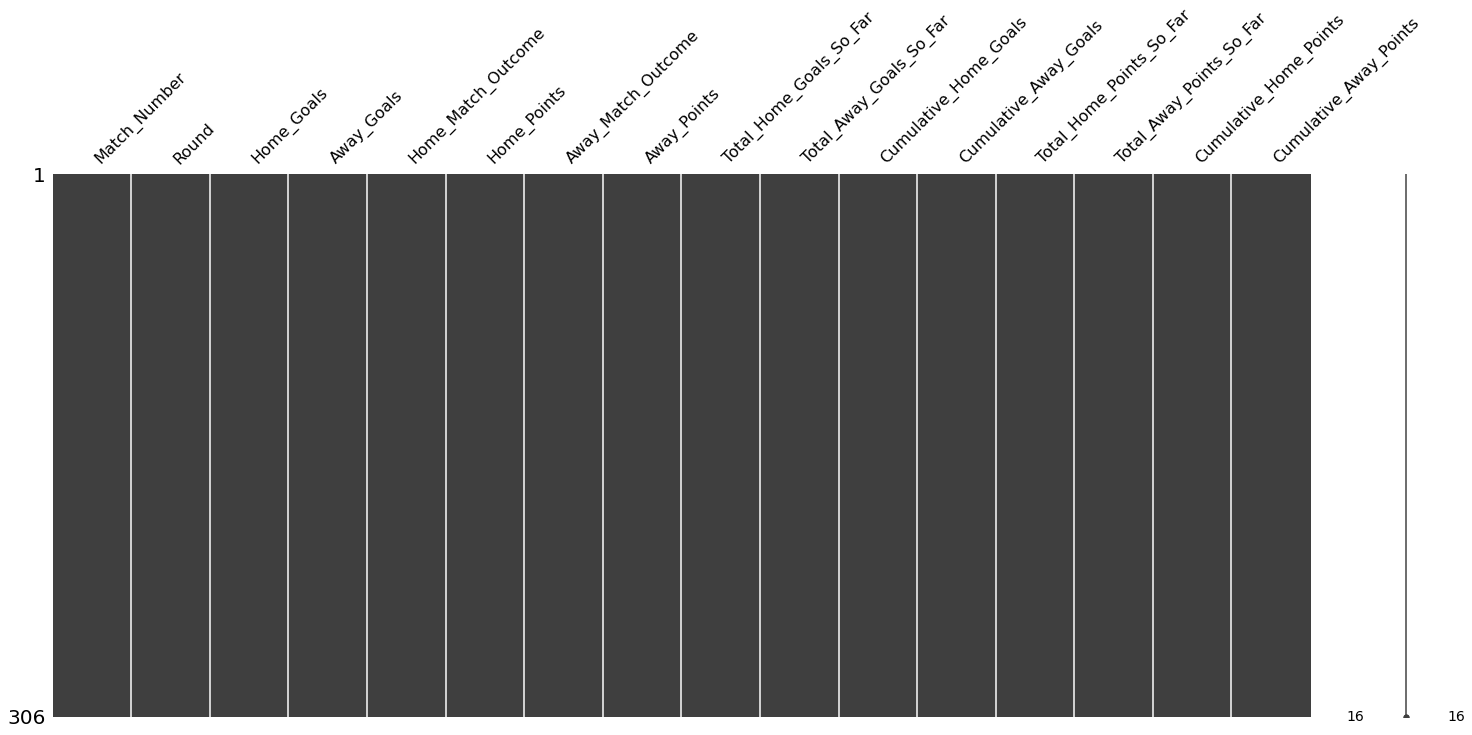

In [9]:
import missingno as msno
import plotly.io as pio
pio.renderers.default = "vscode" #set default renderer to 'notebook' or 'vscode'
msno.matrix(df) #check for columns with missing data

In [10]:
df["Home_Goals"].unique() #return unique values of Series object
df["Away_Goals"].nunique() #return number of unique values of Series object

7

In [11]:
df.isna().sum() #check for summ of any missing values in Series

Match_Number                0
Round                       0
Home_Goals                  0
Away_Goals                  0
Home_Match_Outcome          0
Home_Points                 0
Away_Match_Outcome          0
Away_Points                 0
Total_Home_Goals_So_Far     0
Total_Away_Goals_So_Far     0
Cumulative_Home_Goals       0
Cumulative_Away_Goals       0
Total_Home_Points_So_Far    0
Total_Away_Points_So_Far    0
Cumulative_Home_Points      0
Cumulative_Away_Points      0
dtype: int64

(array([ 93.,   0.,   0.,   0.,   0., 127.,   0.,   0.,   0.,  86.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

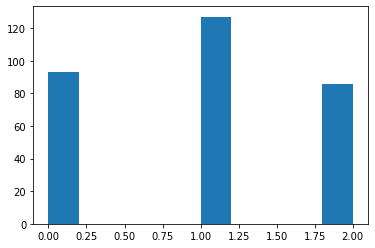

In [12]:
plt.hist(df["Away_Match_Outcome"])

In [13]:
#present linear relationship of home_points
home_points = pd.get_dummies(df["Home_Points"], prefix="Home_Points") #add drop_first = True to get rid of first column in modified DataFrame
home_points

,Home_Points_0,Home_Points_1,Home_Points_3
0,1,0,0
1,0,0,1
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
301,1,0,0
302,1,0,0
303,0,0,1
304,0,0,1


In [14]:
away_points = pd.get_dummies(df["Away_Points"], prefix="Away_Points") #add drop_first = True to get rid of first column in modified DataFrame
away_points

,Away_Points_0,Away_Points_1,Away_Points_3
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
301,0,0,1
302,0,0,1
303,1,0,0
304,1,0,0


In [15]:
home_match_outcome = pd.get_dummies(df["Home_Match_Outcome"], prefix="Home_Match_Outcome") #add drop_first = True to get rid of first column in modified DataFrame
home_match_outcome

,Home_Match_Outcome_0,Home_Match_Outcome_1,Home_Match_Outcome_2
0,0,1,0
1,1,0,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
301,0,1,0
302,0,1,0
303,1,0,0
304,1,0,0


In [16]:
away_match_outcome = pd.get_dummies(df["Away_Match_Outcome"], prefix="Away_Match_Outcome") #add drop_first = True to get rid of first column in modified DataFrame
away_match_outcome

,Away_Match_Outcome_0,Away_Match_Outcome_1,Away_Match_Outcome_2
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
301,1,0,0
302,1,0,0
303,0,1,0
304,0,1,0


In [17]:
'''df = df.join(home_match_outcome).join(away_match_outcome)
df'''

'df = df.join(home_match_outcome).join(away_match_outcome)\ndf'

In [18]:
'''df = df.drop(["Home_Match_Outcome", "Away_Match_Outcome"], axis=1)
df'''

'df = df.drop(["Home_Match_Outcome", "Away_Match_Outcome"], axis=1)\ndf'

In [19]:
'''df = df.join(home_points).join(away_points)
df'''

'df = df.join(home_points).join(away_points)\ndf'

In [20]:
'''df = df.drop(["Home_Points", "Away_Points"], axis=1)
df'''

'df = df.drop(["Home_Points", "Away_Points"], axis=1)\ndf'

In [21]:
'''home_goals = pd.get_dummies(df["Home_Goals"], prefix="Home_Goals") #add drop_first = True to get rid of first column in modified DataFrame
home_goals'''

'home_goals = pd.get_dummies(df["Home_Goals"], prefix="Home_Goals") #add drop_first = True to get rid of first column in modified DataFrame\nhome_goals'

In [22]:
'''away_goals = pd.get_dummies(df["Away_Goals"], prefix="Away_Goals") #add drop_first = True to get rid of first column in modified DataFrame
away_goals'''

'away_goals = pd.get_dummies(df["Away_Goals"], prefix="Away_Goals") #add drop_first = True to get rid of first column in modified DataFrame\naway_goals'

In [23]:
'''df = df.join(home_goals).join(away_goals)
df'''

'df = df.join(home_goals).join(away_goals)\ndf'

In [24]:
df = df.drop(["Away_Goals"], axis = 1)
df

,Match_Number,Round,Home_Goals,Home_Match_Outcome,Home_Points,Away_Match_Outcome,Away_Points,Total_Home_Goals_So_Far,Total_Away_Goals_So_Far,Cumulative_Home_Goals,Cumulative_Away_Goals,Total_Home_Points_So_Far,Total_Away_Points_So_Far,Cumulative_Home_Points,Cumulative_Away_Points
0,0,1,1,1,0,0,3,1,3,1,3,0,3,0,3
1,1,1,1,0,3,1,0,1,0,2,3,3,0,3,3
2,2,1,0,2,1,2,1,0,0,2,3,1,1,4,4
3,3,1,0,1,0,0,3,0,1,2,4,0,3,4,7
4,4,1,0,1,0,0,3,0,1,2,5,0,3,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,301,34,0,1,0,0,3,21,15,419,374,27,14,460,361
302,302,34,2,1,0,0,3,23,24,421,378,24,23,460,364
303,303,34,2,0,3,1,0,18,37,423,379,13,11,463,364
304,304,34,3,0,3,1,0,25,25,426,380,26,20,466,364


In [25]:
'''df = df.drop(["Total_Home_Goals_So_Far", "Total_Away_Goals_So_Far"], axis= 1)
df'''

'df = df.drop(["Total_Home_Goals_So_Far", "Total_Away_Goals_So_Far"], axis= 1)\ndf'

In [26]:
df = df.drop(["Total_Away_Points_So_Far", "Cumulative_Away_Points"], axis= 1)
df

,Match_Number,Round,Home_Goals,Home_Match_Outcome,Home_Points,Away_Match_Outcome,Away_Points,Total_Home_Goals_So_Far,Total_Away_Goals_So_Far,Cumulative_Home_Goals,Cumulative_Away_Goals,Total_Home_Points_So_Far,Cumulative_Home_Points
0,0,1,1,1,0,0,3,1,3,1,3,0,0
1,1,1,1,0,3,1,0,1,0,2,3,3,3
2,2,1,0,2,1,2,1,0,0,2,3,1,4
3,3,1,0,1,0,0,3,0,1,2,4,0,4
4,4,1,0,1,0,0,3,0,1,2,5,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,301,34,0,1,0,0,3,21,15,419,374,27,460
302,302,34,2,1,0,0,3,23,24,421,378,24,460
303,303,34,2,0,3,1,0,18,37,423,379,13,463
304,304,34,3,0,3,1,0,25,25,426,380,26,466


In [27]:
df = df.drop(["Round"], axis=1)
df

,Match_Number,Home_Goals,Home_Match_Outcome,Home_Points,Away_Match_Outcome,Away_Points,Total_Home_Goals_So_Far,Total_Away_Goals_So_Far,Cumulative_Home_Goals,Cumulative_Away_Goals,Total_Home_Points_So_Far,Cumulative_Home_Points
0,0,1,1,0,0,3,1,3,1,3,0,0
1,1,1,0,3,1,0,1,0,2,3,3,3
2,2,0,2,1,2,1,0,0,2,3,1,4
3,3,0,1,0,0,3,0,1,2,4,0,4
4,4,0,1,0,0,3,0,1,2,5,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
301,301,0,1,0,0,3,21,15,419,374,27,460
302,302,2,1,0,0,3,23,24,421,378,24,460
303,303,2,0,3,1,0,18,37,423,379,13,463
304,304,3,0,3,1,0,25,25,426,380,26,466


In [28]:
df = df.drop(["Home_Points", "Away_Match_Outcome", "Away_Points"], axis=1)
df

,Match_Number,Home_Goals,Home_Match_Outcome,Total_Home_Goals_So_Far,Total_Away_Goals_So_Far,Cumulative_Home_Goals,Cumulative_Away_Goals,Total_Home_Points_So_Far,Cumulative_Home_Points
0,0,1,1,1,3,1,3,0,0
1,1,1,0,1,0,2,3,3,3
2,2,0,2,0,0,2,3,1,4
3,3,0,1,0,1,2,4,0,4
4,4,0,1,0,1,2,5,0,4
...,...,...,...,...,...,...,...,...,...
301,301,0,1,21,15,419,374,27,460
302,302,2,1,23,24,421,378,24,460
303,303,2,0,18,37,423,379,13,463
304,304,3,0,25,25,426,380,26,466


In [29]:
'''df = df.drop(["Home_Match_Outcome", "Away_Match_Outcome"], axis=1)
df'''

'df = df.drop(["Home_Match_Outcome", "Away_Match_Outcome"], axis=1)\ndf'

In [30]:
'''import seaborn as sns
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'white'}) #set graph background colours
sns.countplot(df["Home_Match_Outcome_1"], hue=df["Home_Goals_0"])
#sns.histplot(df["Total_Home_Goals_So_Far"])'''

'import seaborn as sns\nsns.set(rc={\'axes.facecolor\':\'lightblue\', \'figure.facecolor\':\'white\'}) #set graph background colours\nsns.countplot(df["Home_Match_Outcome_1"], hue=df["Home_Goals_0"])\n#sns.histplot(df["Total_Home_Goals_So_Far"])'

In [31]:
'''import seaborn as sns
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'white'})
sns.countplot(df["Away_Match_Outcome_1"], hue=df["Away_Goals_2"])'''

'import seaborn as sns\nsns.set(rc={\'axes.facecolor\':\'lightblue\', \'figure.facecolor\':\'white\'})\nsns.countplot(df["Away_Match_Outcome_1"], hue=df["Away_Goals_2"])'

In [32]:
## TRAIN MODEL - only add features which will not leak any information, such as points for both teams at the end of each match ##
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X = df.drop(["Home_Match_Outcome"], axis=1) 
y = df["Home_Match_Outcome"] #variable to be predicted

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [34]:
lr = LogisticRegression()
lr.fit(X_train, y_train)  #fit model according to given training data
y_pred = lr.predict(X_test) #predict class labels for samples in X

In [35]:
##TEST MODEL##
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred) #print accuracy %
#Home_Goals = 0.46774193548387094
#Away_Goals = 0.5967741935483871
#Home_Points = 1.0
#Away_Points = 1.0
#Cumulative_Home_Points = 0.0
#Total_Home_Points_So_Far = 0.1935483870967742
#Home_Match_Outcome = 1.0
#Away_Match_Outcome = 1.0


##--using join() and drop() methods--##

#Away_Match_Outcome_1 = 1.0 #win
#Round = 0.14516129032258066
#Away_Match_Outcome_2 = 1.0 #loss
#Home_Goals_2 = 1.0
#Home_Points_3 = 1.0

###### home_match_outcome 
#1 - Home_Match_Outcome = 0.41935483870967744
#2 - Home_Match_Outcome = 0.4032258064516129 w/cumulative away goals
#3 - Cumulative_Home_Goals = 0.016129032258064516
#4 - Home_Match_Outcome = 0.4838709677419355 w/total home and away goals so far
#5 - Home_Match_Outcome = 1.0 w/home and away goals per match
#6 - Home_Match_Outcome = 0.5967741935483871 w/o away goals per match
#7 - Home_Match_Outcome = 0.5806451612903226 w/total home points so far and cumulative home points

0.5806451612903226

In [36]:
##TRAIN MODEL##

from sklearn.ensemble import RandomForestClassifier 

rf = RandomForestClassifier(n_estimators = 30, random_state = 42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

#Home_Points = 0.9838709677419355
#Away_Points = 0.9838709677419355
#Cumulative_Home_Points = 0.08064516129032258
#Total_Home_Points_So_Far = 0.12903225806451613
#Home_Match_Outcome = 1.0
#Away_Match_Outcome = 1.0

##--using join() and drop() methods--##

#Away_Match_Outcome_2 = 1.0 #loss
#Home_Goals_2 = 0.9516129032258065
#Home_Points_3 = 1.0


#######
#1 - Home_Match_Outcome = 0.3225806451612903
#2 - Home_Match_Outcome = 0.3387096774193548 w/cumulative away goals
#3 - Cumulative_Home_Goals = 0.0967741935483871
#4 - Home_Match_Outcome = 0.5 w/total home and away goals so far
#5 - Home_Match_Outcome = 0.9193548387096774 w/home and away goals per match
#6 - Home_Match_Outcome = 0.6290322580645161 w/o away goals per match
#7 - Home_Match_Outcome = 0.7096774193548387 w/total home points so far and cumulative home points

0.7096774193548387

In [37]:
pd.cut(df['Match_Number'], bins=10, right=True, labels=None)

0      (-0.305, 30.5]
1      (-0.305, 30.5]
2      (-0.305, 30.5]
3      (-0.305, 30.5]
4      (-0.305, 30.5]
            ...      
301    (274.5, 305.0]
302    (274.5, 305.0]
303    (274.5, 305.0]
304    (274.5, 305.0]
305    (274.5, 305.0]
Name: Match_Number, Length: 306, dtype: category
Categories (10, interval[float64, right]): [(-0.305, 30.5] < (30.5, 61.0] < (61.0, 91.5] < (91.5, 122.0] ... (183.0, 213.5] < (213.5, 244.0] < (244.0, 274.5] < (274.5, 305.0]]

In [38]:
match_number = df["Match_Number"]
X_submission = df.drop(["Match_Number"], axis=1)

In [39]:
X_scale_sub = ss.transform(X_submission)

c:\Users\Zoya\miniconda3\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Home_Match_Outcome
Feature names seen at fit time, yet now missing:
- Match_Number




In [40]:
y_submission = rf.predict(X_scale_sub) #lr = LogisticRegression #rf = RandomForestClassifier

In [41]:
y_submission

array([1, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2,
       2, 0, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 1, 0, 2, 0,
       2, 1, 2, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 1, 2, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 2, 1,
       0, 0, 2, 2, 1, 1, 0, 1, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       2, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 2, 1, 1,
       2, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2,
       1, 2, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 2, 2, 0, 2, 0, 1, 0, 0,
       2, 2, 0, 1, 0, 1, 1, 2, 2, 2, 0, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 0, 2, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,

In [42]:
my_dict = {"Match_Number": match_number, "Home_Match_Outcome": y_submission}
submission = pd.DataFrame(my_dict).to_csv("submission.csv", index=False) #load dictionary in DataFrame and save to csv 

In [43]:
# example of making multiple probability predictions
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
# fit final model
model = LogisticRegression()
model.fit(X, y)
# new instances where we do not know the answer
Xnew, _ = make_blobs(n_samples=3, centers=2, n_features=2, random_state=1)
# make a prediction
ynew = model.predict_proba(Xnew)
# show the inputs and predicted probabilities
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

X=[-0.79415228  2.10495117], Predicted=[0.99467199 0.00532801]
X=[-8.25290074 -4.71455545], Predicted=[0.00223842 0.99776158]
X=[-2.18773166  3.33352125], Predicted=[0.99389073 0.00610927]
